In [13]:
%matplotlib notebook
import numpy as np
from numpy import linalg as lin
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
tp=10.0**(-5)
def acc(pos1,pos2):
    accx=-39.748*(pos1[0]-pos2[0])/(lin.norm(pos1-pos2))**(3)
    accy=-39.748*(pos1[1]-pos2[1])/(lin.norm(pos1-pos2))**(3)
    l=np.array([accx,accy])
    return l
def energy(pos1,pos2,v):
    eng=(v[0]**2+v[1]**2)/2 -39.748/lin.norm(pos1-pos2)
    return eng


In [14]:
pos1=np.array([4.0962,0.0])
pos2=np.array([0.0,0.0])
v1=np.array([0.0,1.2413])
lx1=[]
ly1=[]
elp=[]
v1=acc(pos1,pos2)*tp/2+v1
for i in range(1,330001):
    lx1.append(pos1[0])
    ly1.append(pos1[1])
    elp.append(energy(pos1,pos2,v1))
    pos1=pos1+v1*tp
    v1=v1+acc(pos1,pos2)*tp

In [15]:
pos1e=np.array([4.0962,0.0])
pos2e=np.array([0.0,0.0])
v1e=np.array([0.0,1.2413])
lx1e=[]
ly1e=[]
eeu=[]

for i in range(1,330001):
    lx1e.append(pos1e[0])
    ly1e.append(pos1e[1])
    eeu.append(energy(pos1e,pos2e,v1e))
    pos1e=pos1e+v1e*tp
    v1e=v1e+acc(pos1e,pos2e)*tp    

In [16]:
pos1ec=np.array([4.0962,0.0])
pos2ec=np.array([0.0,0.0])
v1ec=np.array([0.0,1.2413])
lx1ec=[]
ly1ec=[]
eeuc=[]

for i in range(1,330001):
    lx1ec.append(pos1ec[0])
    ly1ec.append(pos1ec[1])
    eeuc.append(energy(pos1ec,pos2ec,v1ec))
    v1ec=v1ec+acc(pos1ec,pos2ec)*tp
    pos1ec=pos1ec+v1ec*tp    

In [17]:
pos1v=np.array([4.0962,0.0])
pos2v=np.array([0.0,0.0])
v1v=np.array([0.0,1.2143])
eev=[]
phis=[pos1v,pos1v+tp*v1v]
lx1v=[pos1v[0],phis[1][0]]
ly1v=[pos1v[1],phis[1][1]]
for i in range(1,330001):
    posi=2*phis[1]-phis[0]+(tp**2)*acc(phis[1],pos2v)
    lx1v.append(posi[0])
    ly1v.append(posi[1])
    v=(posi-phis[0])/(2*tp)
    eev.append(energy(posi,pos2v,v))
    phis[0]=phis[1]
    phis[1]=posi

In [18]:
tp1=tp/2
pos1rk=np.array([4.0962,0.0])
v1rk=np.array([0.0,1.2143])
lx1rk=[]
ly1rk=[]
erk=[]
pos2rk=np.array([0.0,0.0])
k1=np.array([0.0,0.0])
k2=np.array([0.0,0.0])
k3=np.array([0.0,0.0])
k4=np.array([0.0,0.0])
for i in range(1,330001):
    lx1rk.append(pos1rk[0])
    ly1rk.append(pos1rk[1])
    erk.append(energy(pos1rk,pos2rk,v1rk))
    k1=acc(pos1rk,pos2rk)
    k2=acc(pos1rk+(v1rk*tp1)+(k1/2)*(tp1**2),pos2rk)
    k3=acc(pos1rk+v1rk*tp1+(k2/2)*(tp1**2),pos2rk)
    k4=acc(pos1rk+2*v1rk*tp1+(k2*2)*(tp1**2),pos2rk)
    v1rk=v1rk+(tp/6)*(k1+2*k2+2*k3+k4)
    pos1rk=pos1rk+v1rk*tp

<IPython.core.display.Javascript object>


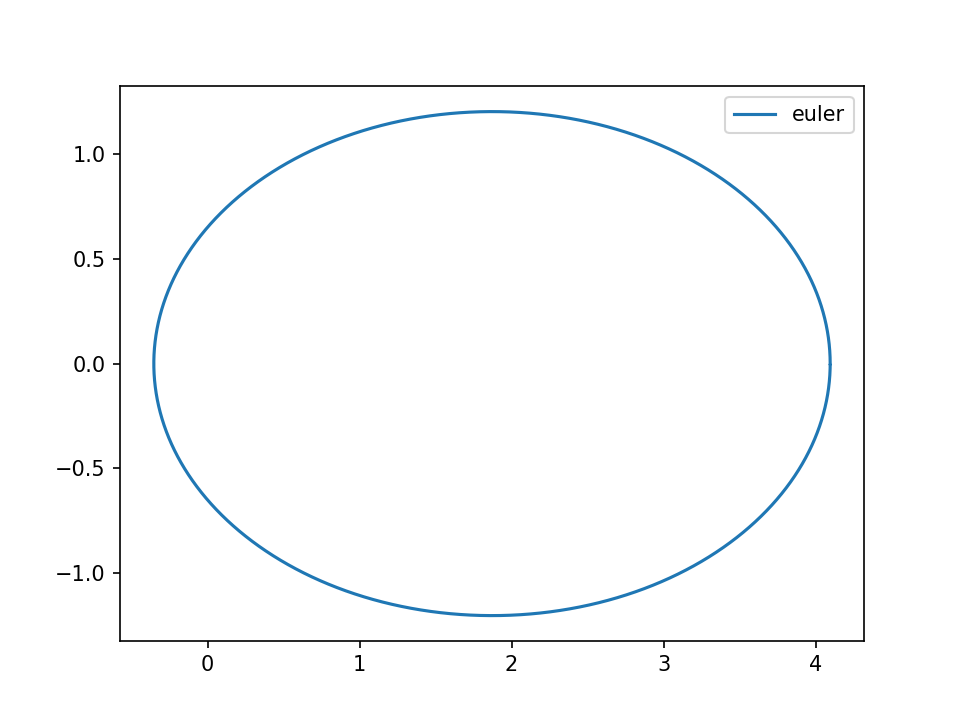

In [25]:
plt.plot(lx1e,ly1e,label='euler')
plt.legend()

<IPython.core.display.Javascript object>


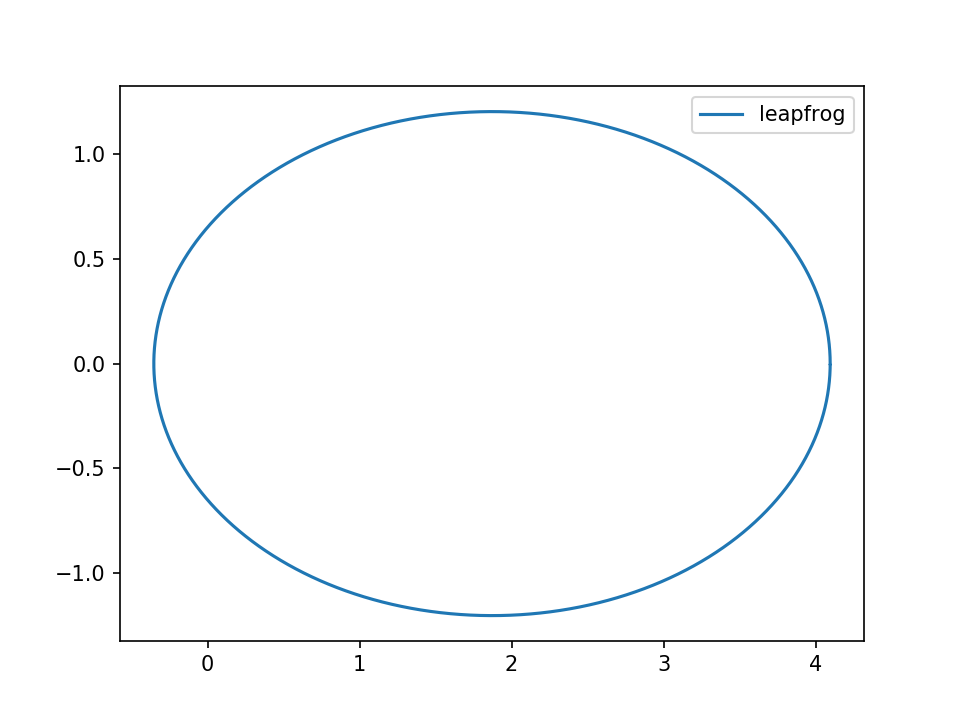

In [26]:
plt.plot(lx1,ly1,label='leapfrog')
plt.legend()

<IPython.core.display.Javascript object>


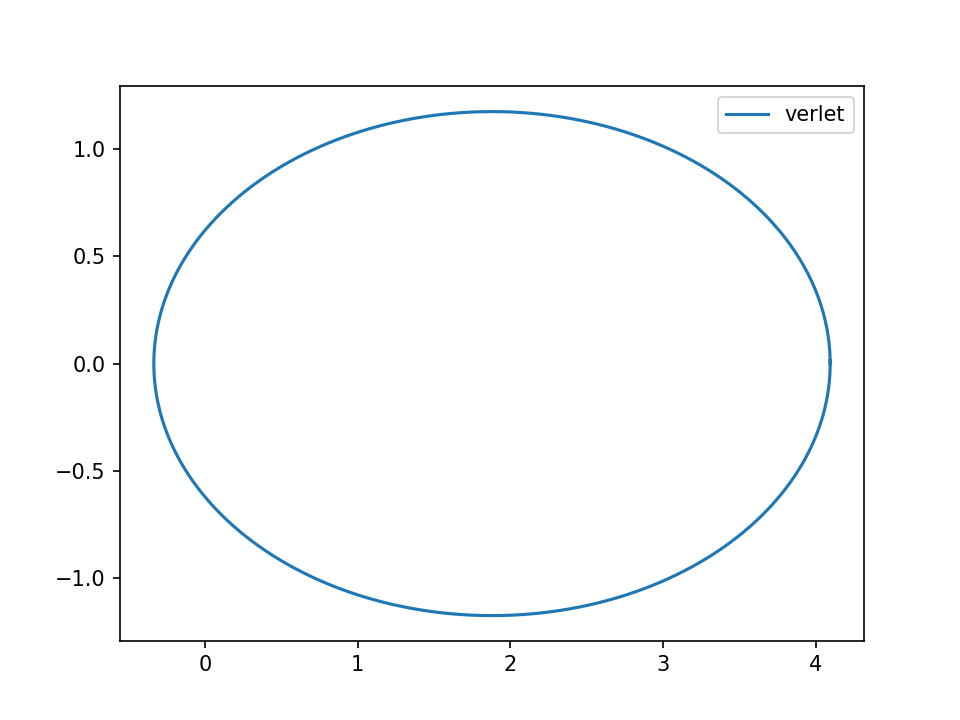

In [29]:
plt.plot(lx1v,ly1v,label='verlet')
plt.legend()

<IPython.core.display.Javascript object>


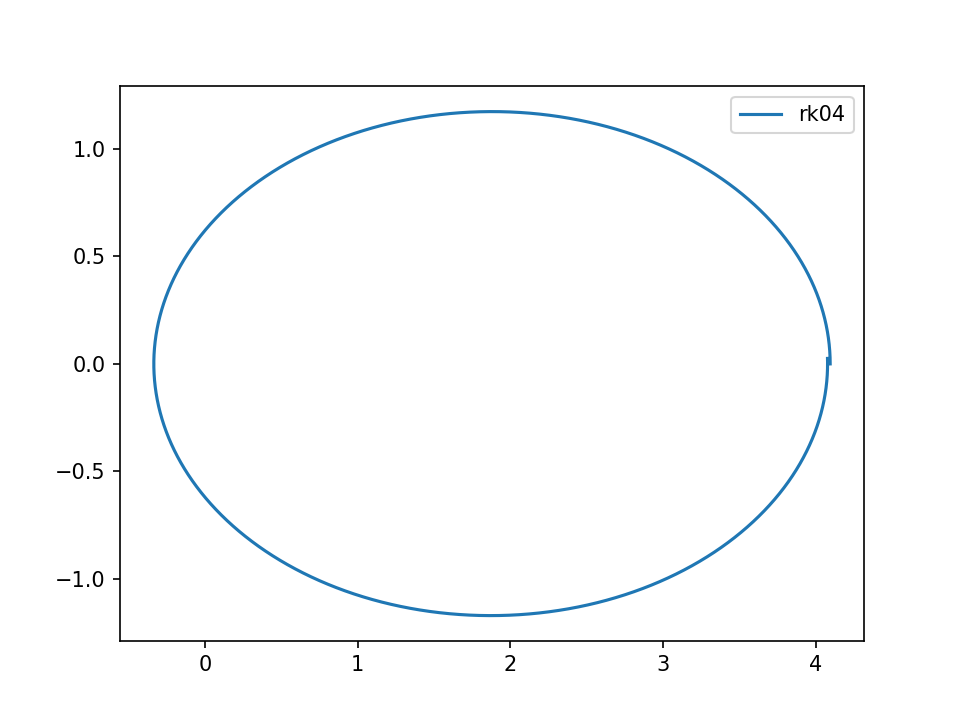

In [30]:
plt.plot(lx1rk,ly1rk,label='rk04')
plt.legend()

<IPython.core.display.Javascript object>


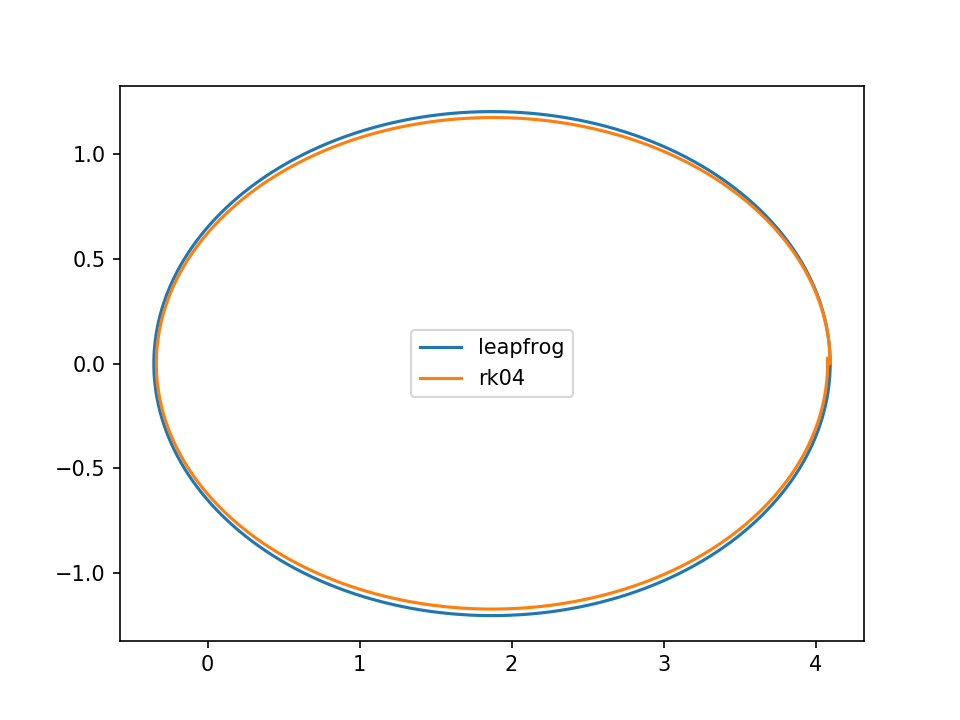

In [31]:
plt.plot(lx1,ly1,label='leapfrog')
plt.plot(lx1rk,ly1rk,label='rk04')
plt.legend()

<IPython.core.display.Javascript object>


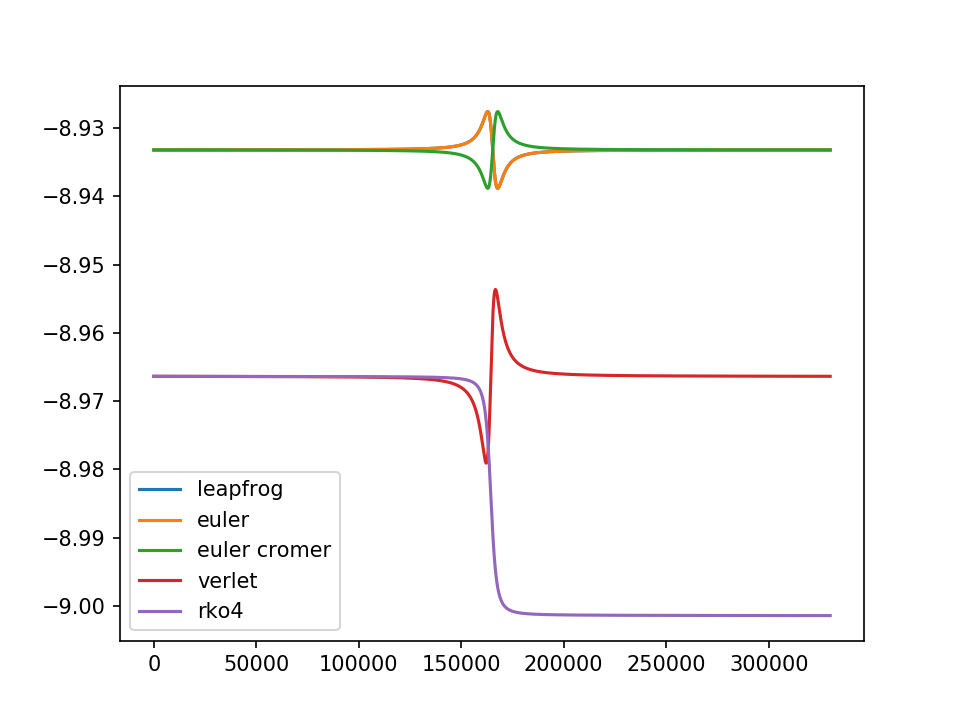

In [33]:
plt.plot(range(1,330001),elp,label='leapfrog')
plt.plot(range(1,330001),eeu,label='euler')
plt.plot(range(1,330001),eeuc,label='euler cromer')
plt.plot(range(1,330001),eev,label='verlet')
plt.plot(range(1,330001),erk,label='rko4')
plt.legend()

<IPython.core.display.Javascript object>


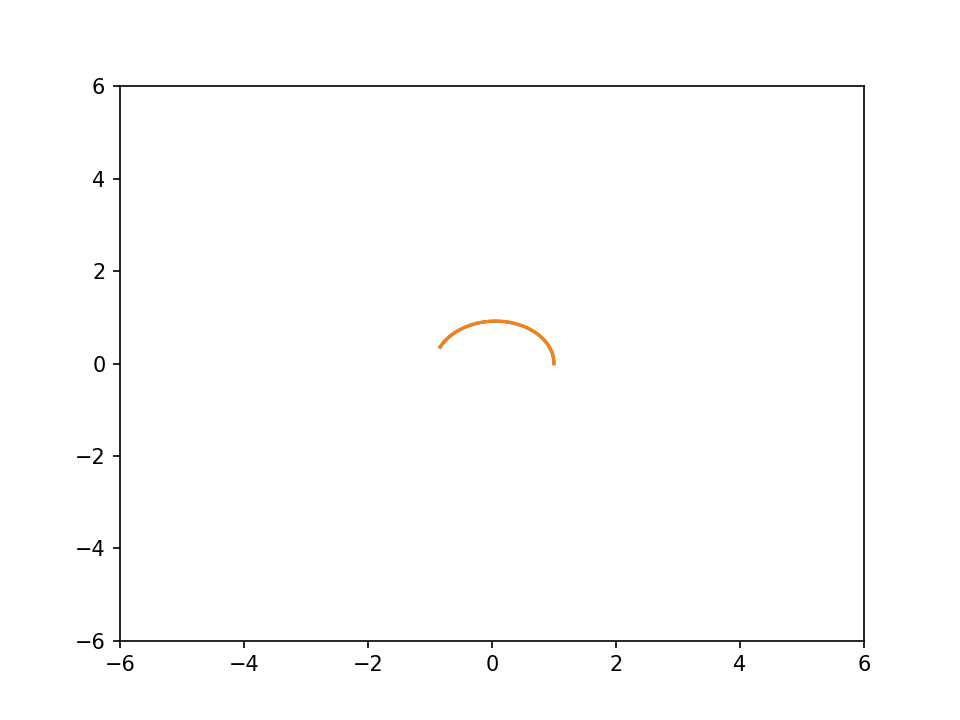

In [41]:
fig,ax=plt.subplots()
ax.set_xlim(-6.0,6.0)
ax.set_ylim(-6.0,6.0)
line1,=ax.plot(0,0)
line2,=ax.plot(0,0)
def anime(i):
    line1.set_xdata(lx1rk[:i])
    line1.set_ydata(ly1rk[:i])
    line2.set_xdata(lx1[:i])
    line2.set_ydata(ly1[:i])
    return line1,line2,
function=FuncAnimation(fig,func=anime,frames=10000,interval=1,repeat=False)
plt.show()       